In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
import plotly
import plotly.express as px
import plotly.graph_objects as go
# !pip install cufflinks

import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot
# !pip install folium

import folium


### 

In [2]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
df = pd.read_csv('covid_19_india.csv')

In [4]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df.drop(['Sno'],axis=1,inplace=True)
df.drop(['Time'],axis=1,inplace=True)
df.drop(['ConfirmedForeignNational'],axis=1,inplace=True)
df.drop(['ConfirmedIndianNational'],axis=1,inplace=True)
df['Active'] = df['Confirmed']-df['Cured']-df['Deaths']
df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active
0,2020-01-30,Kerala,0,0,1,1
1,2020-01-31,Kerala,0,0,1,1
2,2020-02-01,Kerala,0,0,2,2
3,2020-02-02,Kerala,0,0,3,3
4,2020-02-03,Kerala,0,0,3,3


In [6]:
# df.style.background_gradient(cmap='Reds')

In [7]:
df.tail()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active
18105,2021-08-11,Telangana,638410,3831,650353,8112
18106,2021-08-11,Tripura,77811,773,80660,2076
18107,2021-08-11,Uttarakhand,334650,7368,342462,444
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812,545
18109,2021-08-11,West Bengal,1506532,18252,1534999,10215


In [8]:
set(df['State/UnionTerritory'])

{'Andaman and Nicobar Islands',
 'Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'Bihar',
 'Bihar****',
 'Cases being reassigned to states',
 'Chandigarh',
 'Chhattisgarh',
 'Dadra and Nagar Haveli',
 'Dadra and Nagar Haveli and Daman and Diu',
 'Daman & Diu',
 'Delhi',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Himanchal Pradesh',
 'Jammu and Kashmir',
 'Jharkhand',
 'Karanataka',
 'Karnataka',
 'Kerala',
 'Ladakh',
 'Lakshadweep',
 'Madhya Pradesh',
 'Madhya Pradesh***',
 'Maharashtra',
 'Maharashtra***',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'Odisha',
 'Puducherry',
 'Punjab',
 'Rajasthan',
 'Sikkim',
 'Tamil Nadu',
 'Telangana',
 'Telengana',
 'Tripura',
 'Unassigned',
 'Uttar Pradesh',
 'Uttarakhand',
 'West Bengal'}

In [9]:
for index in df.index:
    if df.loc[index,'State/UnionTerritory']=='Bihar****':
        df.loc[index,'State/UnionTerritory']='Bihar'
    elif df.loc[index,'State/UnionTerritory']=='Himanchal Pradesh':
        df.loc[index,'State/UnionTerritory']='Himachal Pradesh'
    elif df.loc[index,'State/UnionTerritory']=='Karanataka':
        df.loc[index,'State/UnionTerritory']='Karnataka'
    elif df.loc[index,'State/UnionTerritory']=='Madhya Pradesh***':
        df.loc[index,'State/UnionTerritory']='Madhya Pradesh'
    elif df.loc[index,'State/UnionTerritory']=='Maharashtra***':
        df.loc[index,'State/UnionTerritory']='Maharashtra'
    elif df.loc[index,'State/UnionTerritory']=='Telengana':
        df.loc[index,'State/UnionTerritory']='Telangana'
# df['State/UnionTerritory']['Bihar****']
df=df[df['State/UnionTerritory']!={'Cases being reassigned to states','Unassigned','Dadra and Nagar Haveli','Daman & Diu'}]
# df=df[df['State/UnionTerritory']!='Unassigned']
# df=df[df['State/UnionTerritory']!='Dadra and Nagar Haveli']
# df=df[df['State/UnionTerritory']!='Daman & Diu']

In [10]:
set(df['State/UnionTerritory'])

{'Andaman and Nicobar Islands',
 'Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'Bihar',
 'Cases being reassigned to states',
 'Chandigarh',
 'Chhattisgarh',
 'Dadra and Nagar Haveli',
 'Dadra and Nagar Haveli and Daman and Diu',
 'Daman & Diu',
 'Delhi',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jammu and Kashmir',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Ladakh',
 'Lakshadweep',
 'Madhya Pradesh',
 'Maharashtra',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'Odisha',
 'Puducherry',
 'Punjab',
 'Rajasthan',
 'Sikkim',
 'Tamil Nadu',
 'Telangana',
 'Tripura',
 'Unassigned',
 'Uttar Pradesh',
 'Uttarakhand',
 'West Bengal'}

In [11]:
df.sort_values(by=['State/UnionTerritory','Date'], inplace=True)
df.reset_index(inplace=True)

In [12]:
df.drop(columns=['index'],inplace=True)

In [13]:
df

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active
0,2020-03-26,Andaman and Nicobar Islands,0,0,1,1
1,2020-03-27,Andaman and Nicobar Islands,0,0,1,1
2,2020-03-28,Andaman and Nicobar Islands,0,0,6,6
3,2020-03-29,Andaman and Nicobar Islands,0,0,9,9
4,2020-03-30,Andaman and Nicobar Islands,0,0,9,9
...,...,...,...,...,...,...
18105,2021-08-07,West Bengal,1503535,18202,1532379,10642
18106,2021-08-08,West Bengal,1504326,18217,1533128,10585
18107,2021-08-09,West Bengal,1505089,18229,1533803,10485
18108,2021-08-10,West Bengal,1505808,18240,1534360,10312


In [14]:
data_statewise = df[df['Date']=='2021-08-11'].reset_index().drop(['index','Date'],axis=1)
data_statewise

,State/UnionTerritory,Cured,Deaths,Confirmed,Active
0,Andaman and Nicobar Islands,7412,129,7548,7
1,Andhra Pradesh,1952736,13564,1985182,18882
2,Arunachal Pradesh,47821,248,50605,2536
3,Assam,559684,5420,576149,11045
4,Bihar,715352,9646,725279,281
5,Chandigarh,61150,811,61992,31
6,Chhattisgarh,988189,13544,1003356,1623
7,Dadra and Nagar Haveli and Daman and Diu,10646,4,10654,4
8,Delhi,1411280,25068,1436852,504
9,Goa,167978,3164,172085,943


# Graphical Representation

<AxesSubplot:xlabel='State/UnionTerritory'>

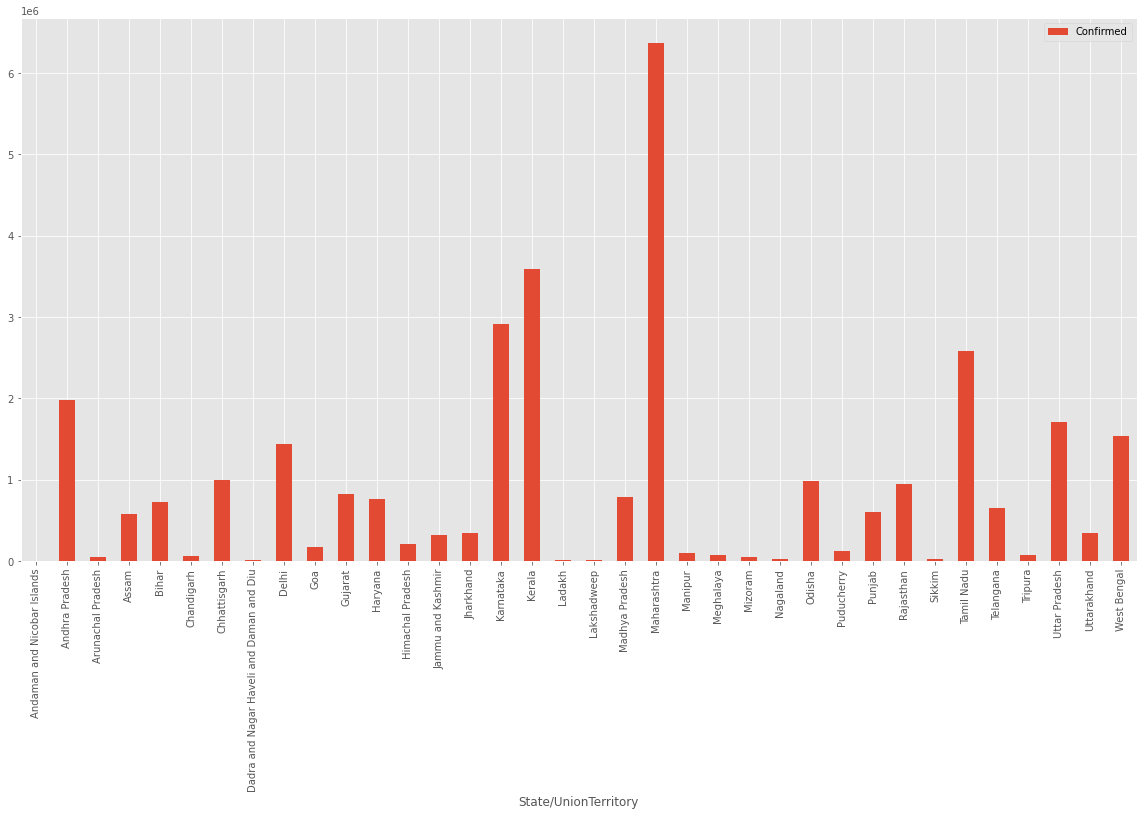

In [15]:
#pandas visualisation
plt.rcParams['figure.figsize']=20,10
data_statewise.plot(kind='bar',x='State/UnionTerritory',y='Confirmed')

<BarContainer object of 36 artists>

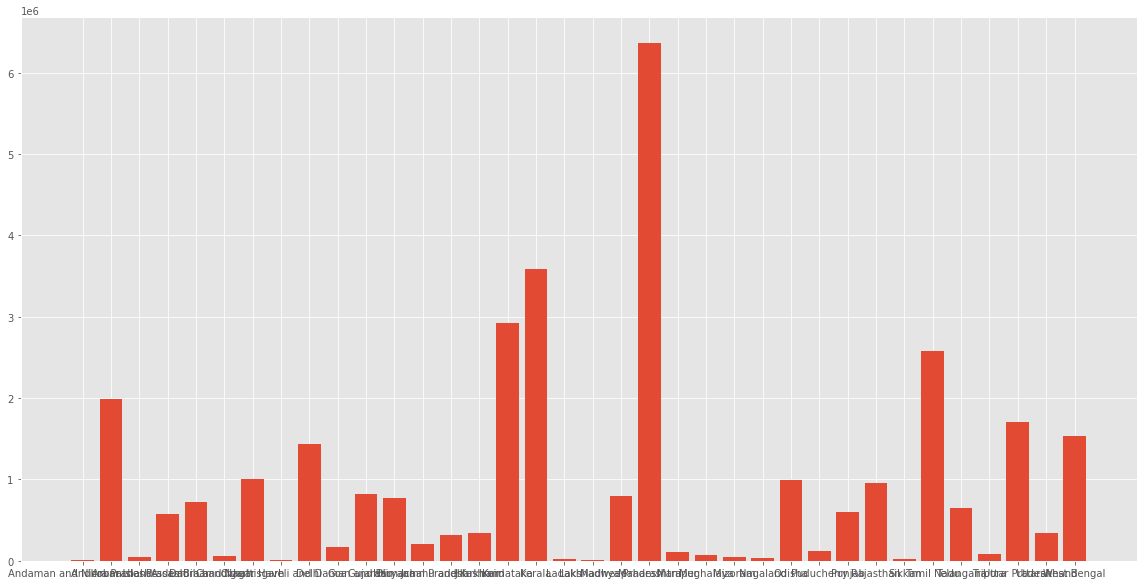

In [16]:
#matplotlib vis
plt.bar(data_statewise['State/UnionTerritory'],data_statewise['Confirmed'])

In [17]:
# plotly vis
data_statewise.iplot(kind='bar',x='State/UnionTerritory',y='Confirmed')

In [18]:
#plotly express use
px.bar(data_statewise,x='State/UnionTerritory',y='Confirmed')

<AxesSubplot:xlabel='State/UnionTerritory', ylabel='Confirmed'>

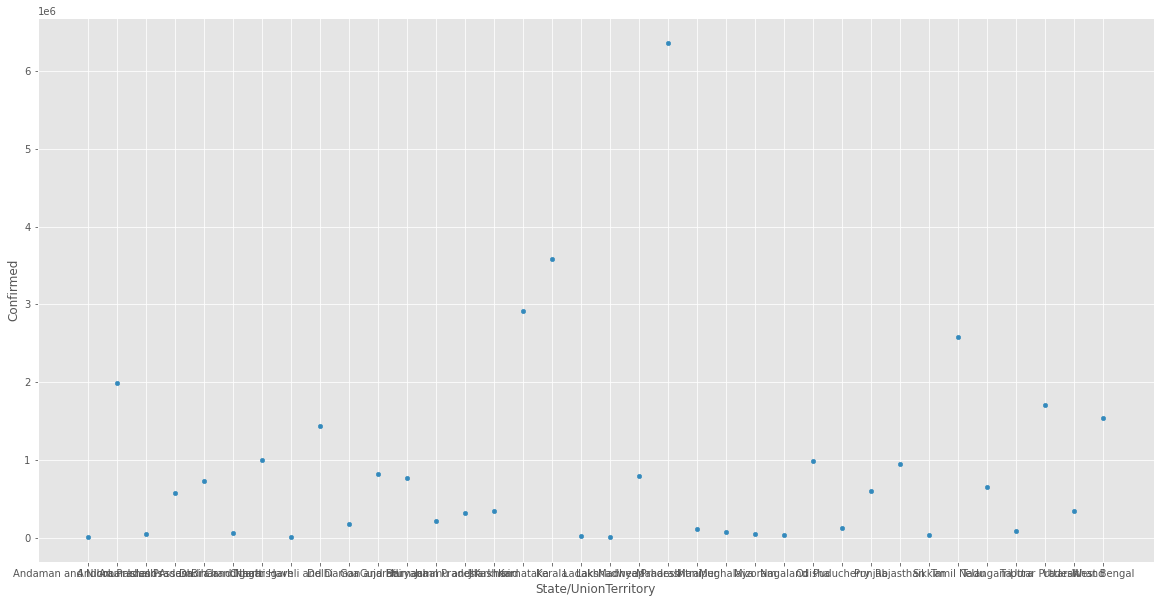

In [19]:
data_statewise.plot(kind='scatter',x='State/UnionTerritory',y='Confirmed')

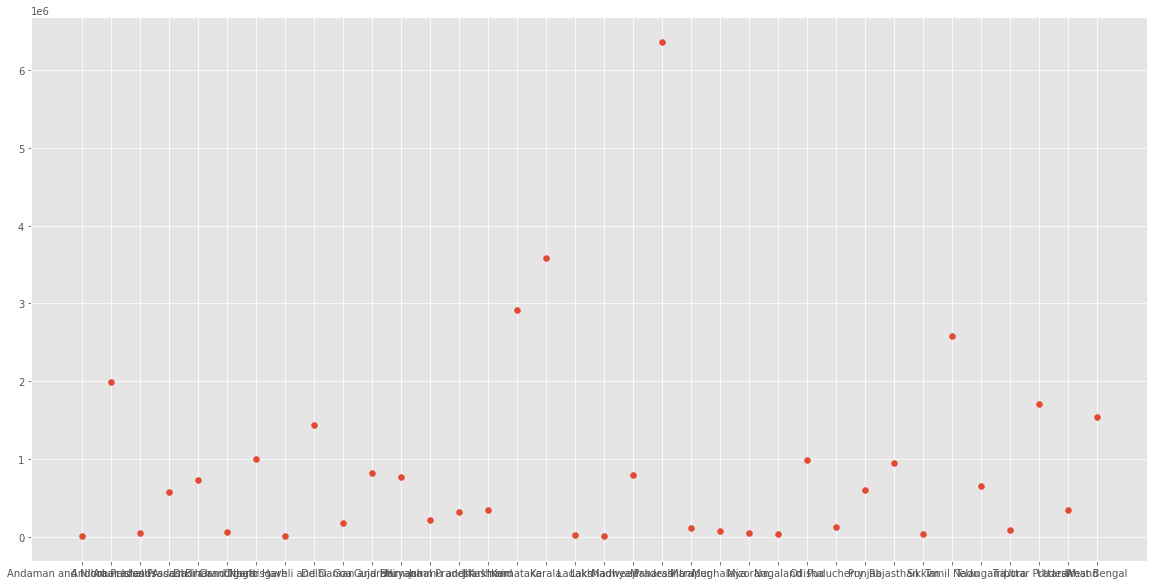

In [20]:
plt.scatter(data_statewise['State/UnionTerritory'],data_statewise['Confirmed'])

In [21]:
data_statewise.iplot(kind='scatter',x='State/UnionTerritory',y='Confirmed',mode='markers+lines',title='BHUGF',color='red',size=20)

In [22]:
px.scatter(data_statewise,x='State/UnionTerritory',y='Confirmed')

# object oriented visualisation

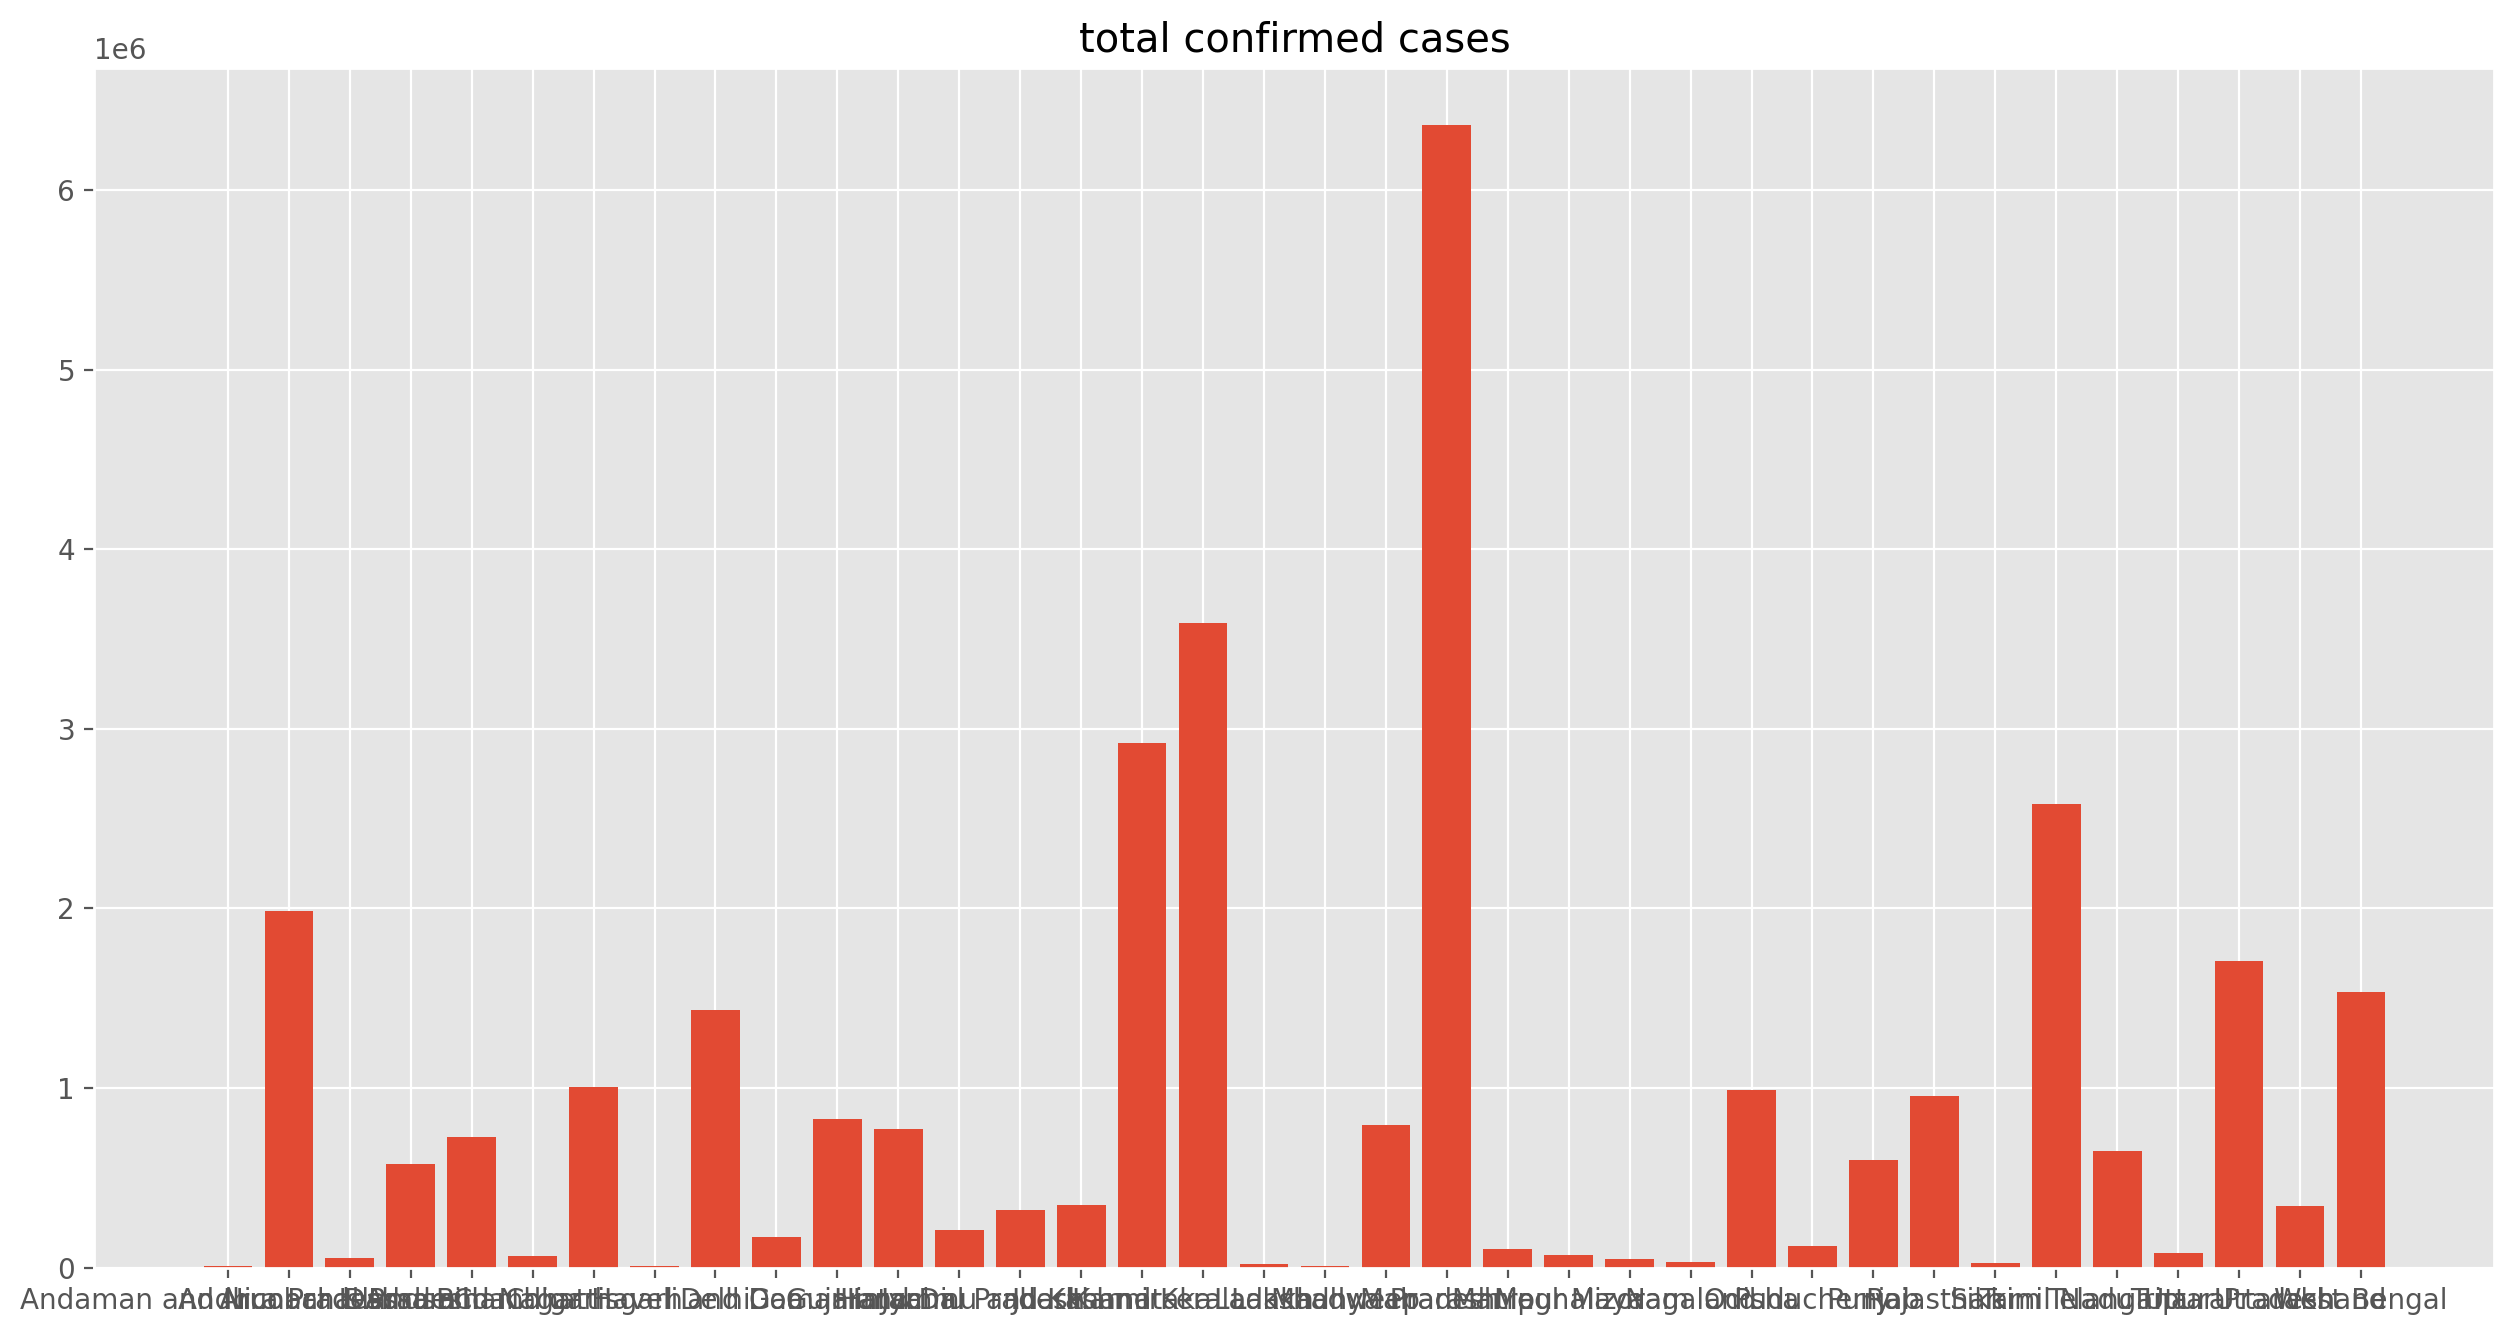

In [23]:
#matplotlib
fig=plt.figure(figsize=(12,6),dpi=200)
axes=fig.add_axes([0,0,1,1])
axes.bar(data_statewise['State/UnionTerritory'],data_statewise['Confirmed'])
axes.set_title('total confirmed cases')
# axes.set_xlabel()
plt.show()

In [24]:
#plotly go
fig=go.Figure()
fig.add_trace(go.Bar(x=data_statewise['State/UnionTerritory'],y=data_statewise['Confirmed']))
# fig.update_layout(title)

# Variation of case

In [25]:
data_goa = df[df['State/UnionTerritory']=='Goa']
data_goa

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active
4598,2020-03-26,Goa,0,0,3,3
4599,2020-03-27,Goa,0,0,3,3
4600,2020-03-28,Goa,0,0,3,3
4601,2020-03-29,Goa,0,0,5,5
4602,2020-03-30,Goa,0,0,5,5
...,...,...,...,...,...,...
5097,2021-08-07,Goa,167556,3157,171705,992
5098,2021-08-08,Goa,167649,3159,171814,1006
5099,2021-08-09,Goa,167736,3160,171883,987
5100,2021-08-10,Goa,167884,3164,171944,896


In [26]:
fig=px.bar(data_goa,'Date','Confirmed',color='Confirmed')
fig.show()